In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
base_dir = r"C:\Users\OptiSAR\Desktop\p\Fish_Dataset"

In [5]:
os.listdir(base_dir)

['Big Head Carp',
 'Black Sea Sprat',
 'Catfish',
 'Freshwater Eel',
 'Hourse Mackerel',
 'Indian Carp',
 'Red Mullet',
 'Red Sea Bream',
 'Sea Bass',
 'Shrimp',
 'Silver Carp',
 'Tilapia',
 'Trout']

In [7]:
IMAGE_SIZE=224
BATCH_SIZE=64   

In [9]:
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
    )


In [11]:
test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
     rescale=1./255,
     validation_split=0.1
)

In [13]:
train_datagen=train_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='training'
)

test_datagen=test_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='validation'
)

Found 8781 images belonging to 13 classes.
Found 975 images belonging to 13 classes.


In [15]:
Data = tf.keras.utils.image_dataset_from_directory(base_dir)

Found 9776 files belonging to 13 classes.


In [17]:
data_iterator = Data.as_numpy_iterator()

In [19]:
batch = data_iterator.next()

In [21]:
batch= next(train_datagen)

In [23]:
batch[0].shape

(64, 224, 224, 3)

In [25]:
batch[1]

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 

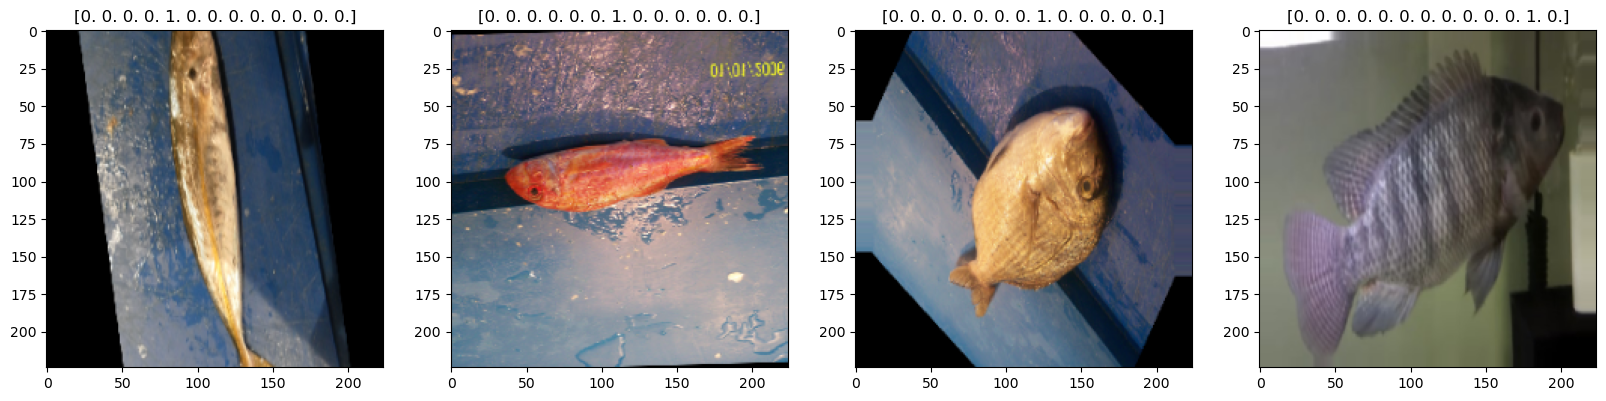

In [27]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    
    ax[idx].title.set_text(batch[1][idx])

In [31]:
model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(224, activation='relu'))
model.add(Dense(13, activation='softmax'))

In [33]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
     

In [35]:
history = model.fit(train_datagen,
                    epochs=100,
                    validation_data=test_datagen)

Epoch 1/100


C:\jupyter\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


138/138 ━━━━━━━━━━━━━━━━━━━━ 393s 3s/step - accuracy: 0.4258 - loss: 1.6265 - val_accuracy: 0.7467 - val_loss: 0.7317
Epoch 2/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 312s 2s/step - accuracy: 0.8104 - loss: 0.5417 - val_accuracy: 0.8010 - val_loss: 0.6452
Epoch 3/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 308s 2s/step - accuracy: 0.8740 - loss: 0.3501 - val_accuracy: 0.8903 - val_loss: 0.4412
Epoch 4/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 300s 2s/step - accuracy: 0.9154 - loss: 0.2524 - val_accuracy: 0.8862 - val_loss: 0.4232
Epoch 5/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 300s 2s/step - accuracy: 0.9303 - loss: 0.1998 - val_accuracy: 0.8400 - val_loss: 0.5182
Epoch 6/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 300s 2s/step - accuracy: 0.9436 - loss: 0.1623 - val_accuracy: 0.8359 - val_loss: 0.6282
Epoch 7/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 300s 2s/step - accuracy: 0.9642 - loss: 0.1120 - val_accuracy: 0.9077 - val_loss: 0.4656
Epoch 8/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 300s 2s/step - accuracy: 0.9681 - loss: 0.0981 - val_accuracy

In [45]:
test_loss,test_acc = model.evaluate(test_datagen)
print("test_accuracy:",test_acc)

16/16 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.8878 - loss: 0.8672
test_accuracy: 0.8871794939041138


In [47]:
x_test,y_test = next(test_datagen)

In [51]:
y_pred = model.predict(x_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


In [53]:
y_pred_classes = np.argmax(y_pred,axis=1)

In [55]:
y_test_classes = np.argmax(y_test,axis=1)

In [57]:
print("True labels: ",y_test_classes[:13])
print("Predicted labels: ",y_pred_classes[:13])

True labels:  [ 9  7 11 12  6 10 11  4 11 10  0  1  7]
Predicted labels:  [ 9  7 11  7  6 10  5  4  5 10  0  4  7]


In [59]:
class_labels = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12])
class_name = np.array(['Big Head Carp','Black Sea Sprat','Catfish','Freshwater Eel', 'Hourse Mackerel', 'Indian Carp', 'Red Mullet','Red Sea Bream','Sea Bass','Shrimp','Silver Carp', 'Tilapia', 'Trout'])

In [83]:
def display_image(images,labels,predicted_labels):
    fig,axes = plt.subplots(4,4,figsize=(20,10))
    axes = axes.ravel()
    for i in np.arange(0,13):
        axes[i].imshow(images[i],cmap='gray')
        axes[i].set_title("True:{}\nPredicted: {}".format(class_name[labels[i]],class_name[predicted_labels[i]]))
        axes[i].axis("off")
    plt.subplots_adjust(wspace=0.5)
    plt.show()

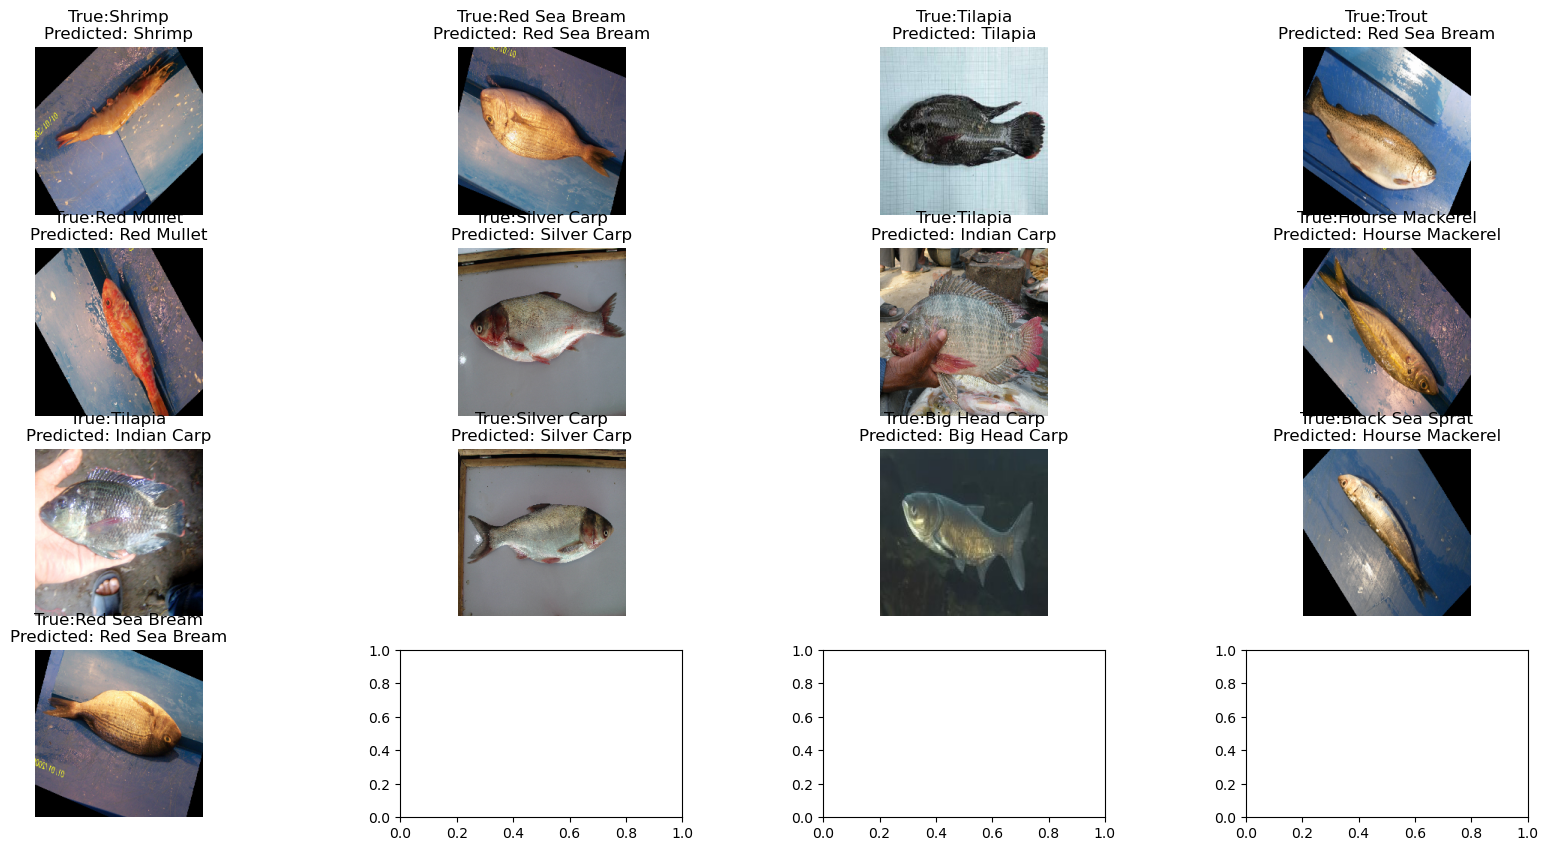

In [85]:
display_image(x_test[:13],y_test_classes[:13],y_pred_classes[:13])